In [1]:
# -*- coding:utf-8 -*-
import openpyxl
from bs4 import BeautifulSoup
from urllib.request import urlopen
import csv, re, requests
import time

# 엑셀파일 열기
filename = "test.xlsx"
book = openpyxl.load_workbook(filename)

# 맨 앞의 시트 추출하기
sheet = book.worksheets[0]

# 시트의 각 행을 순서대로 추출하기
data = []
for row in sheet.rows:
    data.append([row[0].value, row[1].value,row[2].value])

del data[0]

for i in range(len(data)):
    print(data[i])

print(len(data))

[' DM500S9Z-AD3BA', 'SAMSUNG', '2020.11.19']
[' FA506IU-HN174', 'ASUS', '2020.11.19']
[' GA502IV-AZ001T', 'ASUS', '2020.11.19']
[' NT750QCJ-K58A', 'SAMSUNG', '2020.11.19']
[' NT950XCJ-X716A', 'SAMSUNG', '2020.11.19']
['15M A10SE-i7', 'MSI', '2020.11.19']
['15U50N-KR56K', 'LG', '2020.11.19']
['15UD50N-GX50K', 'LG', '2020.11.19']
['15ZD90N-VX5BK', 'LG', '2020.11.19']
['17UD70N-G.AX76K', 'LG', '2020.11.19']
['800G5 TWR 6BD60AV', 'HP', '2020.11.19']
['AS G512LI-HN065', 'ASUS', '2020.11.19']
['B80FV', 'LG', '2020.11.19']
['DB400T9A i5-9400', 'SAMSUNG', '2020.11.19']
['FA706IU-H7100', 'ASUS', '2020.11.19']
['G512LU-AL043', 'ASUS', '2020.11.19']
['G712LU-EV001', 'ASUS', '2020.11.19']
['G731GT-H7114', 'ASUS', '2020.11.19']
['GA502IU-AZ015T', 'ASUS', '2020.11.19']
['GA502IV-AZ001', 'ASUS', '2020.11.19']
['GF75 Thin 9SCXR', 'MSI', '2020.11.19']
['GP75 Leopard 9SD', 'MSI', '2020.11.19']
['GU502LV-AZ015', 'ASUS', '2020.11.19']
['GU502LW-HC111T', 'ASUS', '2020.11.19']
['GX550LWS-HC013R', 'ASUS', '2

# Beautiful 빠르나 결국 URL당 접근하면 느려지기때문에 selenium 검색과 시간 비교

In [2]:
start = time.time()  # 시작 시간 저장
result=[]


for i in range(len(data)):
    if data[i][0]== None:
        break
    else:
        url = 'https://search.shopping.naver.com/search/all?query=' + data[i][0]
        print(url)
        req = requests.get(url)   # 크롤링할 페이지 url로 요청 보내기 , req를 출력하면 statuscode만 출력됨
        html = req.text                # html 코드를 가져온다!
        soup = BeautifulSoup(html, 'html.parser')
        if soup.find('span', class_="price_num__2WUXn").text == None:
                         result.append("해당상품없음")
        else:
            data[i].append(soup.find('span', class_="price_num__2WUXn").text)
            
# 작업 코드
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(data)

https://search.shopping.naver.com/search/all?query= DM500S9Z-AD3BA
https://search.shopping.naver.com/search/all?query= FA506IU-HN174
https://search.shopping.naver.com/search/all?query= GA502IV-AZ001T
https://search.shopping.naver.com/search/all?query= NT750QCJ-K58A
https://search.shopping.naver.com/search/all?query= NT950XCJ-X716A
https://search.shopping.naver.com/search/all?query=15M A10SE-i7
https://search.shopping.naver.com/search/all?query=15U50N-KR56K
https://search.shopping.naver.com/search/all?query=15UD50N-GX50K
https://search.shopping.naver.com/search/all?query=15ZD90N-VX5BK
https://search.shopping.naver.com/search/all?query=17UD70N-G.AX76K
https://search.shopping.naver.com/search/all?query=800G5 TWR 6BD60AV
https://search.shopping.naver.com/search/all?query=AS G512LI-HN065
https://search.shopping.naver.com/search/all?query=B80FV
https://search.shopping.naver.com/search/all?query=DB400T9A i5-9400
https://search.shopping.naver.com/search/all?query=FA706IU-H7100
https://search.s

# DB에 해당 데이터 뿌려주기 

2. MSSQL 사용 절차,
Python에서 MSSQL에 있는 데이타를 사용하는 일반적인 절차는 다음과 같다.<br>

pymssql 모듈을 import 한다<br>
pymssql.connect() 메소드를 사용하여 MSSQL에 Connect 한다. 호스트명, 로그인, 암호, 접속할 DB 등을 파라미터로 지정할 수 있다.<br>
DB 접속이 성공하면, Connection 객체로부터 cursor() 메서드를 호출하여 Cursor 객체를 가져온다. DB 커서는 Fetch 동작을 관리하는데 사용된다.<br>
Cursor 객체의 execute() 메서드를 사용하여 SQL 문장을 DB 서버에 보낸다.<br>
SQL 쿼리의 경우 Cursor 객체의 fetchall(), fetchone(), fetchmany() 등의 메서드를 사용하여 데이타를 서버로부터 가져온 후, Fetch 된 데이타를 사용한다.<br>
삽입, 갱신, 삭제 등의 DML(Data Manipulation Language) 문장을 실행하는 경우, INSERT/UPDATE/DELETE 후 Connection 객체의 commit() 메서드를 사용하여 데이타를 확정 갱신한다.<br>
Connection 객체의 close() 메서드를 사용하여 DB 연결을 닫는다.<br>
아래 예제들의 기본 샘플 데이타로 아래와 같은 Customer 테이블이 있다고 가정하자.<br>

In [3]:
print(data[0][3])
print(type(data[0][3]))

549,000원
<class 'str'>


UTF-8 문제로인하여 해결되지않았던 문제를 해결함. <br>
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 11: invalid start byte <br>
위에 나온 문제가 계속나와서 별것도아닌걸로 계속 끙끙됌 

In [4]:
import datetime


now = datetime.datetime.now()
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2020-11-25


In [12]:
 # -*- coding: utf-8 -*-

import easygui
import pymssql
import pandas as pd

now = datetime.datetime.now()
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

# MSSQL 접속
conn = pymssql.connect(host=r"211.233.21.82", user='bif', password='DWBIF2020!@#', database='DB_PRICE', charset='utf8')

# Connection 으로부터 Cursor 생성
cursor = conn.cursor()
try:
    for i in range(len(data)-1):
        #SQL문 실행
        cursor.execute("INSERT INTO dbo.price_table(date, product_ID,company, price)  VALUES (%s,%s,%s,%s);", (nowDate,data[i][0],data[i][1],data[i][3]))
except:
    easygui.msgbox('추가된 데이터 오류 혹은 중복 실행으로 인한 오류', '대원CTS 최저가 비교 크롤링')

else:   
    conn.commit()
    conn.close()

2020-11-25


# 디비로부터 데이터 추출

In [181]:

# MSSQL 접속
conn = pymssql.connect(host=r"211.233.21.82", user='bif', password='DWBIF2020!@#', database='DB_PRICE', charset='utf8')

# Connection 으로부터 Cursor 생성
cursor = conn.cursor()
 
# SQL문 실행
cursor.execute('SELECT * FROM dbo.price_table;')
row = cursor.fetchall()
cols = [item[0] for item in cursor.description]
df=pd.DataFrame(row,columns=cols)

df.head()

,date,product_id,price,company
0,2020-11-19,DM500S9Z-AD3BA,"548,720¿ø",SAMSUNG
1,2020-11-19,FA506IU-HN174,"1,199,000¿ø",ASUS
2,2020-11-19,GA502IV-AZ001T,"1,699,000¿ø",ASUS
3,2020-11-19,NT750QCJ-K58A,"1,797,990¿ø",SAMSUNG
4,2020-11-19,NT950XCJ-X716A,"2,087,700¿ø",SAMSUNG


In [182]:
import re

long=len(df['price'])

for i in range(long):
    slt=re.findall("[0-9]", df['price'][i])
    df['price'][i]=int(''.join(slt))
    
df.to_csv("C:\\Users\\user\\Desktop\\result.csv")


,date,product_id,price,company
0,2020-11-19,DM500S9Z-AD3BA,548720,SAMSUNG
1,2020-11-19,FA506IU-HN174,1199000,ASUS
2,2020-11-19,GA502IV-AZ001T,1699000,ASUS
3,2020-11-19,NT750QCJ-K58A,1797990,SAMSUNG
4,2020-11-19,NT950XCJ-X716A,2087700,SAMSUNG
...,...,...,...,...
180,2020-11-25,NT550XCR-AD1WA,498990,SAMSUNG
181,2020-11-25,NT550XCR-AD2A,598000,SAMSUNG
182,2020-11-25,NT550XCR-AD5A + NVMe SSD 512GB,998000,SAMSUNG
183,2020-11-25,NT550XCR-GD5A,1198990,SAMSUNG


In [183]:
#데이터 타입 확인|

df.dtypes

date          object
product_id    object
price         object
company       object
dtype: object

In [184]:
df.head(5)

,date,product_id,price,company
0,2020-11-19,DM500S9Z-AD3BA,548720,SAMSUNG
1,2020-11-19,FA506IU-HN174,1199000,ASUS
2,2020-11-19,GA502IV-AZ001T,1699000,ASUS
3,2020-11-19,NT750QCJ-K58A,1797990,SAMSUNG
4,2020-11-19,NT950XCJ-X716A,2087700,SAMSUNG


In [185]:
# 타입 변경

df['date'] = pd.to_datetime(df['date'])

df['price']=pd.to_numeric(df['price'])

In [351]:
# 변경된 데이터 타입 확인
df.dtypes



date          datetime64[ns]
product_id            object
price                  int64
company               object
dtype: object

In [187]:
df.head()

,date,product_id,price,company
0,2020-11-19,DM500S9Z-AD3BA,548720,SAMSUNG
1,2020-11-19,FA506IU-HN174,1199000,ASUS
2,2020-11-19,GA502IV-AZ001T,1699000,ASUS
3,2020-11-19,NT750QCJ-K58A,1797990,SAMSUNG
4,2020-11-19,NT950XCJ-X716A,2087700,SAMSUNG


In [188]:
#회사목록
print(df['company'].unique())

df['company'].nunique()

['SAMSUNG' 'ASUS' 'MSI' 'LG' 'HP' 'APPLE']


6

In [189]:
# 현재 몇일 동안 데이터를 수집하고있는지 확인 가능.
df['date'].nunique()

5

# 가격대별 제품 갯수 확인

In [190]:
morethan3=df[df['price']>3000000]['product_id'].nunique()
morethan3

3

In [191]:
morethan2=df[df['price']>2000000]['product_id'].nunique()-morethan3
morethan2


2

In [192]:
morethan1=df[df['price']>1500000]['product_id'].nunique()-5
morethan1

11

In [193]:
morethan0=df[df['price']>1000000]['product_id'].nunique()-16
morethan0

12

In [194]:
morethan=df[df['price']<1000000]['product_id'].nunique()
morethan

10

In [218]:
# 타입 변경

# MSSQL 접속
conn = pymssql.connect(host=r"211.233.21.82", user='bif', password='DWBIF2020!@#', database='DB_PRICE', charset='utf8')

# Connection 으로부터 Cursor 생성
cursor = conn.cursor()
 
# SQL문 실행
cursor.execute('SELECT * FROM dbo.price_table;')
row = cursor.fetchall()
cols = [item[0] for item in cursor.description]
df=pd.DataFrame(row,columns=cols)

df.head()

import re

long=len(df['price'])

for i in range(long):
    slt=re.findall("[0-9]", df['price'][i])
    df['price'][i]=int(''.join(slt))
    
df.to_csv("C:\\Users\\user\\Desktop\\result.csv")


df['date'] = pd.to_datetime(df['date'])

df['price']=pd.to_numeric(df['price'])

product_id=df['product_id'].unique()
product_id[0]

' DM500S9Z-AD3BA'

In [219]:
df[df['product_id']==product_id[0]]

,date,product_id,price,company
0,2020-11-19,DM500S9Z-AD3BA,548720,SAMSUNG
37,2020-11-20,DM500S9Z-AD3BA,548720,SAMSUNG
74,2020-11-23,DM500S9Z-AD3BA,548730,SAMSUNG
111,2020-11-24,DM500S9Z-AD3BA,549000,SAMSUNG
148,2020-11-25,DM500S9Z-AD3BA,549000,SAMSUNG


In [349]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [353]:
import matplotlib 
matplotlib.font_manager._rebuild()

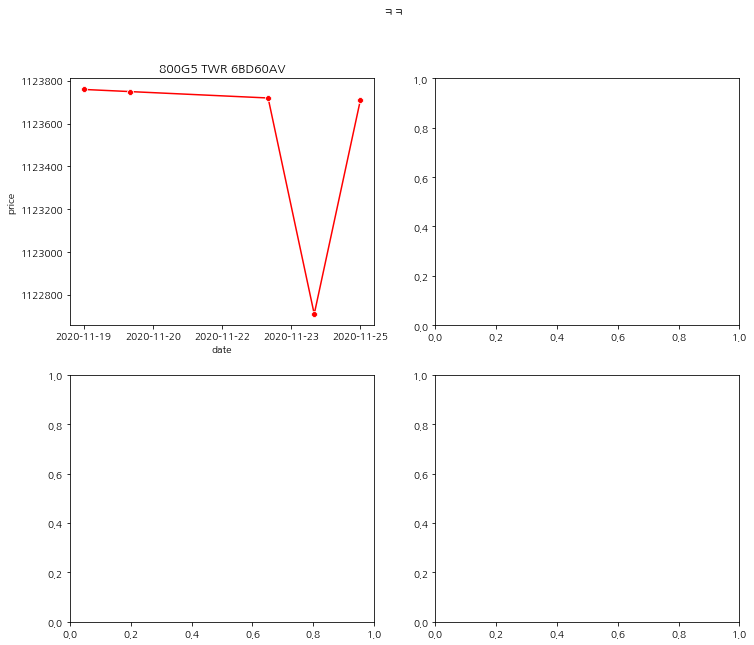

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


font_location = './NanumFontSetup_TTF_ALL/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_location).get_name()

fig, axe = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
sns.lineplot(x='date',y='price' ,data=df[df['product_id']==product_id[10]],marker='8',color='red', ax=axe[0,0])
axe[0,0].set_title(product_id[10])
axe[0,0].xaxis.set_major_locator(MultipleLocator(1.5))
fig.suptitle("ㅋㅋ",family=font_name)


fig.savefig("./1.png")

In [223]:
df_wide = df.pivot("date", "product_id", "price")
df_wide.head()

product_id,DM500S9Z-AD3BA,FA506IU-HN174,GA502IV-AZ001T,NT750QCJ-K58A,NT950XCJ-X716A,15M A10SE-i7,15U50N-KR56K,15UD50N-GX50K,15ZD90N-VX5BK,17UD70N-G.AX76K,...,LG 15ZD90N-V.AX7BK,MHK33KH/A,NT350XCR-AD5WA,NT550EBV-AD5BA,NT550XCJ-KC24,NT550XCR-AD1WA,NT550XCR-AD2A,NT550XCR-AD5A + NVMe SSD 512GB,NT550XCR-GD5A,NT950XCR-G58A
date,,,,,,,,,,,,,,,,,,,,,
2020-11-19,548720,1199000,1699000,1797990,2087700,1634060,1082690,872680,1340410,1735450,...,1362990,1784800,848000,880990,746720,498990,598000,998000,1198990,1538960
2020-11-20,548720,1199000,1699000,1797990,2087690,1613910,1091960,863090,1340390,1735450,...,1623110,1784800,848000,880990,746700,498990,598000,998000,1198990,1538960
2020-11-23,548730,1199000,1699000,1797990,2087690,1499000,1103560,863090,1344110,1735450,...,1623110,1843000,848000,880990,746540,498990,598000,998000,1198990,1528000
2020-11-24,549000,1199000,1699000,1797990,2087700,1499000,1082690,863090,1344090,1735450,...,1623110,1843000,848000,880980,746530,498990,598000,998000,1198990,1527000
2020-11-25,549000,1199000,1699000,1797990,2097000,1498990,1091820,853500,1346640,1735450,...,1623110,1804200,848000,880980,746500,498990,598000,998000,1198990,1526990


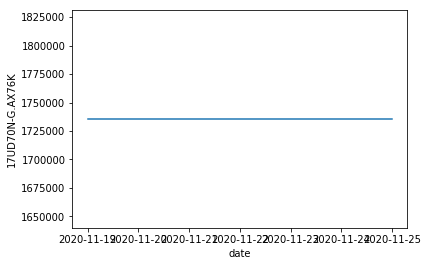

In [235]:
sns.lineplot(data=df_wide["17UD70N-G.AX76K"])

In [262]:
df300=df[df['company']=='LG']
df300

,date,product_id,price,company
6,2020-11-19,15U50N-KR56K,1082690,LG
7,2020-11-19,15UD50N-GX50K,872680,LG
8,2020-11-19,15ZD90N-VX5BK,1340410,LG
9,2020-11-19,17UD70N-G.AX76K,1735450,LG
12,2020-11-19,B80FV,1499000,LG
27,2020-11-19,LG 15ZD90N-V.AX7BK,1362990,LG
43,2020-11-20,15U50N-KR56K,1091960,LG
44,2020-11-20,15UD50N-GX50K,863090,LG
45,2020-11-20,15ZD90N-VX5BK,1340390,LG
46,2020-11-20,17UD70N-G.AX76K,1735450,LG


In [263]:
df_wide = df300.pivot("date", "product_id", "price")


Text(0.5,1,'LG')

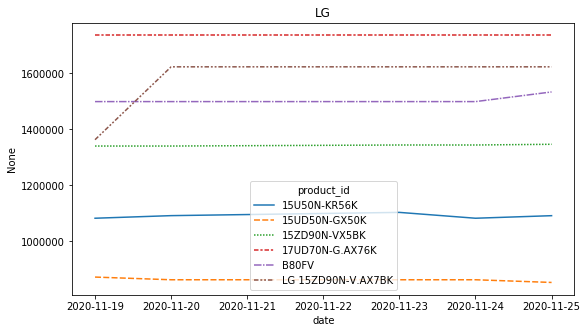

In [269]:
fig, axe = plt.subplots(figsize=(9,5))
sns.lineplot(data=df_wide)
plt.title("LG")